# To do

Na seção "BOW" o código conta qualquer valor que seja encontrado dentro da vaga que tenha o nome da competência filtrada, então, quando for pesquisada a competência "java", por exemplo, caso na descrição da vaga conste "javascript", o código irá acusar como True a busca para "java", pois o mesmo encontra qualquer valor. Isso é um problema para procurar pela linguagem de programação "r" pois será sempre acusado como True em 100% das vagas

# Importando pacotes

In [1]:
#pip install https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-2.2.5/pt_core_news_sm-2.2.5.tar.gz#egg=pt_core_news_sm==2.2.5 --no-deps
#! python -m spacy download pt
#!pip install spacy
#!pip install spacy download pt_core_news_sm
#!python -m spacy download pt_core_web_sm

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import spacy
import pt_core_news_sm
import string
from nltk import ngrams
from collections import Counter
from operator import itemgetter
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt

# Busca

In [3]:
search = 'Cientista de dados'

In [4]:
search = search.replace(' ','-')

# Definindo URL e parser

In [5]:
page = requests.get('https://www.vagas.com.br/vagas-de-'+search)

In [6]:
soup = BeautifulSoup(page.content, 'html.parser')

# Encontrando onde estão os links para as vagas 

In [7]:
vagas = soup.find_all(class_ = 'link-detalhes-vaga')

In [8]:
#Armazenando links em uma lista
lista = []
for i in vagas:
    lista.append(i.get('href'))

In [9]:
#Testanto hiperlinks da lista
lista1 = []
for i in lista:
    lista1.append('https://www.vagas.com.br/'+i)

# Definindo loop

In [10]:
df = pd.DataFrame()
comp = []
for i in lista1:
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    competencias = soup.find(class_= 'texto')
    competencias_ = competencias.get_text(strip = True)
    
    comp.append(competencias_)
    
df['Competencias'] = comp

In [11]:
#Removendo acentos e pontuação das colunas 
for i in range(len(df.Competencias)):
    df.Competencias[i] = unidecode(df.Competencias[i])
    df.Competencias[i] = df.Competencias[i].replace(';',' ')
    df.Competencias[i] = df.Competencias[i].replace('.',' ')

# Instanciando NLP

In [12]:
#Instanciando NLP

nlp = spacy.load('pt_core_news_sm')

In [13]:
#Definindo puntuações a serem removidas
punctuations = string.punctuation

In [14]:
#Função que substitui palavras ou termos que são sinonimos
def junta_sinonimo(x,y):
  df['Competencias'] = df['Competencias'].str.replace(x,y)

# Tratamento de dados unigrams

In [15]:
junta_sinonimo('estatisticas','estatistica')

In [16]:
deletar_unigram = ['by', 'r','medica','ti','sobre', 'de','e','em','a','com','o','da', 'ou', 'que', 'dos', 'como', 'os', 'ou', 'para', 'do', 'na', 'and',\
                  'no', 'uma', 'as', 'por', 'mais', 'um', 'areas', 'no', 'conhecimento', 'nos', 'voce','dados','para', 'analisar','que','learning','do',\
                   'machine','que','experiencia','data','modelos','analise','ferramentas','desenvolvimento','etc','tecnicas','programacao','conhecimentos','formacao','modelagem',\
                  'matematica', '\r\n','big','linguagens','solucoes','computacao','science','banco','area','projetos','negocio','algoritmos','das','to','sistemas','desenvolver',\
                  'problemas','desejavel','nao','engenharia','processos','superior','analises','ciencia','requisitos','insights','clientes','uso','bancos','tecnologia','ter',\
                  'empresa','criacao','negocios','avancado','of','capacidade','utilizando','the','ser','se','sao','trabalhar','software','linguagem','outros','servicos','inteligencia',\
                  'in','resultados','estruturados','time','power', 'oportunidades','atividades','trabalho','principais','identificar','tempo']

In [17]:
stopwords = ['de' ,'a' ,'o' ,'que' ,'e' ,'do' ,'da' ,'em' ,'um' ,'para' ,'é' ,'com' ,'não' ,'uma' ,'os' ,'no' ,'se' ,'na' ,'por' ,'mais' ,'as' ,'dos' ,'como' ,'mas' ,'foi' ,'ao' ,'ele' ,'das' ,'tem' ,'à' ,'seu' ,'sua' ,'ou' ,'ser' ,'quando' ,'muito' ,'há' ,'nos' ,'já' ,'está' ,'eu' ,'também' ,'só' ,'pelo' ,'pela' ,'até' ,'isso' ,'ela' ,'entre' ,'era' ,'depois' ,'sem' ,'mesmo' ,'aos' ,'ter' ,'seus' ,'quem' ,'nas' ,'me' ,'esse' ,'eles' ,'estão' ,'você' ,'tinha' ,'foram' ,'essa' ,'num' ,'nem' ,'suas' ,'meu' ,'às' ,'minha' ,'têm' ,'numa' ,'pelos' ,'elas' ,'havia' ,'seja' ,'qual' ,'será' ,'nós' ,'tenho' ,'lhe' ,'deles' ,'essas' ,'esses' ,'pelas' ,'este' ,'fosse' ,'dele' ,'tu' ,'te' ,'vocês' ,'vos' ,'lhes' ,'meus' ,'minhas','teu' ,'tua','teus','tuas','nosso' ,'nossa','nossos','nossas','dela' ,'delas' ,'esta' ,'estes' ,'estas' ,'aquele' ,'aquela' ,'aqueles' ,'aquelas' ,'isto' ,'aquilo' ,'estou','está','estamos','estão','estive','esteve','estivemos','estiveram','estava','estávamos','estavam','estivera','estivéramos','esteja','estejamos','estejam','estivesse','estivéssemos','estivessem','estiver','estivermos','estiverem','hei','há','havemos','hão','houve','houvemos','houveram','houvera','houvéramos','haja','hajamos','hajam','houvesse','houvéssemos','houvessem','houver','houvermos','houverem','houverei','houverá','houveremos','houverão','houveria','houveríamos','houveriam','sou','somos','são','era','éramos','eram','fui','foi','fomos','foram','fora','fôramos','seja','sejamos','sejam','fosse','fôssemos','fossem','for','formos','forem','serei','será','seremos','serão','seria','seríamos','seriam','tenho','tem','temos','tém','tinha','tínhamos','tinham','tive','teve','tivemos','tiveram','tivera','tivéramos','tenha','tenhamos','tenham','tivesse','tivéssemos','tivessem','tiver','tivermos','tiverem','terei','terá','teremos','terão','teria','teríamos','teriam']

In [18]:
#Tokenização
tokenization_unigram = []
for i in df.Competencias:
    
    #Instanciando NLP
    doc = nlp(i)
    
    #Selecionando somente Adjetivos e nomes próprios
    tokens = [token for token in doc if token.pos_ == 'ADJ' or token.pos_ == 'PROPN']
    
    #Conversão de Tokens para string
    tokens = [token.orth_ for token in tokens]
       
    #To lower
    tokens = [(token.lower()) for token in tokens]
    
    #Removendo itens da lista de removação manual
    tokens = [token for token in tokens if (token not in deletar_unigram)]
    
    #Removendo stopwords e punctuations
    tokens = [token for token in tokens if (token not in stopwords and token not in punctuations)]  
    
    tokenization_unigram += (tokens)

In [19]:
ngram_counts1 = Counter(ngrams(tokenization_unigram, 1))

# Tratamento de bigrams

In [20]:
#deletar_bigram = ['de','com', 'e', 'em', 'banco', 'a', 'o', 'na','para', 'da','python','\r\n', 'dos','science','dados','programacao', 'ou','areas','experiencia',\
#                 'os','resolver','computacao','hadoop','matematica', 'ensino', 'tecnicas', 'tais','como','conhecimento','grandes','por','as']

In [21]:
##Definindo sinonimos e termos a deletar
#junta_sinonimo('superior completo','formacao superior')
#junta_sinonimo('ensino superior','formacao superior')
#junta_sinonimo('aprendizado de maquina', 'machine learning')

In [22]:
##Tokenização
#tokenization_bigram = []
#for i in df.Competencias:
#    doc = nlp(i)
#    tokens = [token.orth_ for token in doc]
#    tokens = [token for token in tokens if (token not in punctuations and token not in deletar_bigram)]
#    tokenization_bigram += (tokens)

In [23]:
#ngram_counts2 = Counter(ngrams(tokenization_bigram, 2))

In [24]:
#ngram_counts2.most_common(10)

# Tratamento trigrams

In [25]:
#deletar_trigrams = ['e','dados']

In [26]:
##Tokenização
#tokenization_trigram = []
#for i in df.Competencias:
#    doc = nlp(i)
#    tokens = [token.orth_ for token in doc]
#    tokens = [token for token in tokens if (token not in punctuations and token not in deletar_trigrams)]
#    tokenization_trigram += (tokens)

In [27]:
#ngram_counts3 = Counter(ngrams(tokenization_trigram, 3))

In [28]:
#ngram_counts3.most_common(10)

# Concatenando resultados e gerando lista dos mais citados

In [29]:
ngram_counts = ngram_counts1.most_common(10) #+ ngram_counts2.most_common(10) + ngram_counts3.most_common(10)

In [30]:
ngram_counts = sorted(ngram_counts, key=itemgetter(1),reverse=True)
print(ngram_counts)

[(('python',), 9), (('estatistica',), 7), (('analytics',), 7), (('relacional',), 7), (('bi',), 6), (('sintaxe',), 6), (('sql',), 6), (('dominio',), 6), (('marketing',), 6), (('tableau',), 5)]


# Aplicando BOW para visualização dos dados 

In [31]:
df_resultado = df.copy()

In [32]:
#Transformando tudo em minusculo
df_resultado.Competencias = df_resultado.Competencias.str.lower()

In [33]:
def get_first(iterable, default=None):
    if iterable:
        for item in iterable:
            return item
    return default
    
for j in ngram_counts:
    Item = get_first(j)
    ItemString = ' '.join(Item)
    df_resultado[ItemString] = df_resultado['Competencias'].apply(lambda x: 1 if ItemString in x else 0)

In [34]:
df_resultado.head()

,Competencias,python,estatistica,analytics,relacional,bi,sintaxe,sql,dominio,marketing,tableau
0,descricaoatividades:apoiar no processo de ino...,0,1,1,0,1,0,0,0,0,1
1,descricaogente e tudo pra gente_pessoas sao o ...,1,1,0,1,1,1,1,1,0,0
2,descricaoa incubadora analytics e uma area da ...,1,0,1,0,0,0,0,0,0,0
3,descricao,0,0,0,0,0,0,0,0,0,0
4,descricaoa incubadora analytics e uma area da ...,1,1,1,1,1,1,1,1,0,0


# Plotando resultados

In [35]:
df_resultado_t = df_resultado.T

In [36]:
df_resultado2 = df_resultado.drop(columns=['Competencias'])
col_sum = []

for i in df_resultado2.columns:
    col_sum.append(df_resultado2[i].sum())


In [37]:
#definindo primeira row como nome das colunas
df_resultado_t.columns = df_resultado_t.iloc[0]
#dropando primeira row
df_resultado_t = df_resultado_t.drop(df_resultado_t.index[0])
#definindo index como nova coluna 
df_resultado_t['Competencias'] = df_resultado_t.index

In [38]:
df_resultado_t['count'] = col_sum
df_resultado_t['count'] = (df_resultado_t['count']/len(df_resultado)*100)

In [39]:
df_resultado_t = df_resultado_t[['Competencias','count']].reset_index(drop=True)

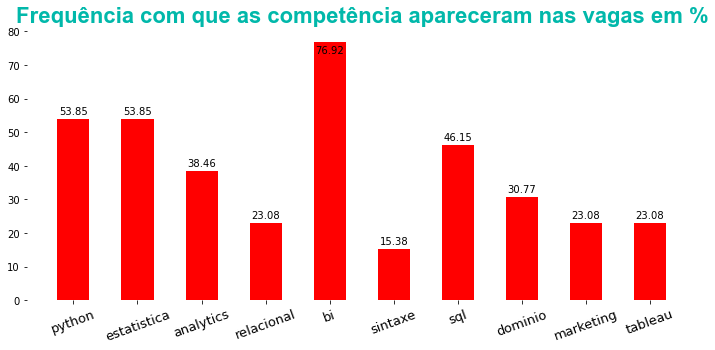

In [40]:
N = len(df_resultado_t)
bars = df_resultado_t['count']

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(ind, bars, width, color='r')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Freq')
ax.set_title('Frequência com que as competência apareceram nas vagas em %', FontSize= 22, color = '#01B8AA',fontname = 'Arial',fontweight = "bold")
ax.set_xticks(ind)
ax.set_xticklabels(df_resultado_t['Competencias'], fontsize= 13, rotation=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                round(height,2),  #Round displayed number
                ha='center', va='bottom')

autolabel(rects1, ax)

plt.show()